# **Heart disease diagnosis prediction using multiple classifiers and ensemble methods**

Heart disease is the leading cause of death for men and women. About **610,000 people** die of heart disease in the United States every year, which is **1 out of every 4 deaths!**
<a href="https://www.cdc.gov/heartdisease/facts.htm">(Centers for Disease Control and Prevention)</a>  

This is a binary classification problem.  There are numerous factors that can contribute to the presence of heart disease.  This data set from the UCI Machine Learning Repository (Cleveland) previously contained 76 features but now contains 14 (13 variables and one target). What is the most important factor causing heart disease?  What factors do not contribute to heart disease?  Can an accurate classifier be built to predict the presence of heart disease in patients?  These are the questions we want to answer with this project.   A reference for the data set can be found
<a href="http://archive.ics.uci.edu/ml/datasets/heart">here</a>.

## **Attribute Information** ##
age: age in years  
sex: sex (1 = male; 0 = female)   
cp: chest pain type    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 1: typical angina  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 2: atypical angina  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 3: non-anginal pain  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 4: asymptomatic  
trestbps: resting blood pressure (in mmHg on admission to the hospital)  
chol: serum cholestoral in mg/dl  
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
restecg: resting electrocardiographic results  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 0: normal  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
thalach: maximum heart rate achieved  
exang: exercise induced angina (1 = yes; 0 = no)  
oldpeak = ST depression induced by exercise relative to rest  
slope: the slope of the peak exercise ST segment  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 1: upsloping  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 2: flat  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 3: downsloping  
ca: number of major vessels (0-3) colored by flourosopy  
thal: blood disorder referred to as thalassemia  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 3: normal  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 6: fixed defect  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 7: reversible defect  
class: severerity of heart disease (angiographic disease status)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 0: Absent  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 1: Level 1  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 2: Level 2  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 3: Level 3  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 4: Level 4  
target: heart disease  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 0: No  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Value 1: Yes  


List of important packages

In [467]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm
import matplotlib.ticker as mtick
import matplotlib.style as style
import seaborn as sns
import scipy
from google.colab import files
from scipy.stats import randint, loguniform, expon
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics  
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection.partial_dependence import partial_dependence, plot_partial_dependence
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import SVC, LinearSVC
import lightgbm as lgb
from mlxtend.classifier import StackingClassifier
import eli5
from eli5.sklearn import PermutationImportance
from mpl_toolkits.mplot3d import Axes3D
import shap
import warnings
warnings.filterwarnings('ignore')

This project was initiated in Google Colab so a TPU could be utilized for randomized search cross-validation and hyperparameter tuning.  Here, we will import the data set.

In [3]:
# necessary to read files into Colab
uploaded_files = files.upload()

Saving Cleveland_hd.csv to Cleveland_hd.csv


In [4]:
# Now, we can read the .csv file from desktop
df = pd.read_csv('Cleveland_hd.csv')

## **Exploratory Data Analysis**

Let's take a look at the data set

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Here, a binary column called 'target' will be created where a 0 will mean "No" and a 1 will mean "Yes."  This could give us a probability but we want to predict the diagnosis per patient.  

In [6]:
# create binary column called target for classification to indicate presence of heart disease
df['target'] = np.where(df['class'] > 0, 1, 0)

Info is a good way to take a look to see if there are missing values and what types of data we have.  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  class     303 non-null    int64  
 14  target    303 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 35.6 KB


Looks like there are some null values but there are not a lot of them.  Let's find them.

In [8]:
# Find null rows
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0,0


To find only 6 out of 303 is not bad so let's remove them for modeling purposes.
Normally, we may want to contact the source to see if these values could be recovered.

In [9]:
df = df.dropna()

In [10]:
df.isnull().values.any()

False

There are no more missing values but some of the features have unusual names.  This could be problematic in the future so they will be renamed for clarity.  The variable 'thalach' is simply the maximum heart rate, so we will rename it "max_rate."  The variable 'ca' is actually the number of blood vessels colored with fluorosopy which sounds important too.  This will take on 'vessels' as the feature name.

In [11]:
df = df.rename(columns={'thalach': 'max_rate', 'ca': 'vessels'})

In [12]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,max_rate,exang,oldpeak,slope,vessels,thal,class,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1


The columns have been successfully renamed. Up next, visualization!  Below is a graph of the number of patients who have heart disease and patients that do not.

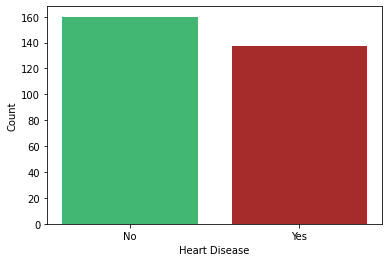

In [13]:
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['#42B773', '#A62C2B'])
positions = (0,1)
plt.xticks(positions, ('No','Yes'))
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

The good news is that there are fairly similar numbers for a diagnosis of "Yes" or "No" so no stratified splits will be necessary here.  The bad news is that almost half of this data set has been diagnosed with heart disease.  

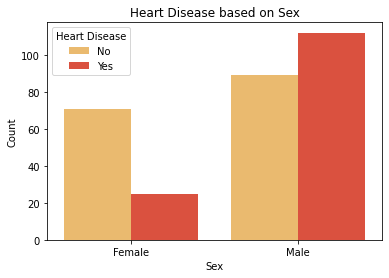

In [14]:
ax = sns.countplot(x='sex', hue='target', data=df, palette = 'YlOrRd')
ax.set_xlabel('Sex')
ax.set_title('Heart Disease based on Sex')
ax.set_xticklabels(['Female','Male'])
plt.legend(title='Heart Disease', loc='upper left', labels=['No', 'Yes'])
plt.ylabel('Count')
plt.show()

This is concerning if you are Male because you are at a much higher risk for heart disease!

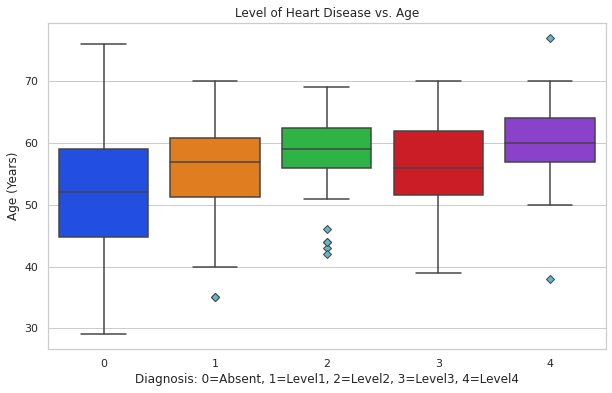

In [15]:
plt.figure(figsize=(10,6))
outliers = dict(markerfacecolor='c', marker='D')
palette = sns.color_palette("bright")
sns.set(style="whitegrid")
sns.boxplot(x='class', y='age', data=df, flierprops=outliers, palette = palette)
plt.xlabel('Diagnosis: 0=Absent, 1=Level1, 2=Level2, 3=Level3, 4=Level4')
plt.ylabel('Age (Years)')
plt.title('Level of Heart Disease vs. Age')
plt.show()

Boxplots are great because they depict the statistics of distributions and any outliers that may exist.  It appears as if there is a slight correlation between age and the seriousness of a heart disease condition, but if you are in your 40's, you still might want to be careful!  Interestingly enough, Level 1 and Level 3 appear paradoxical??

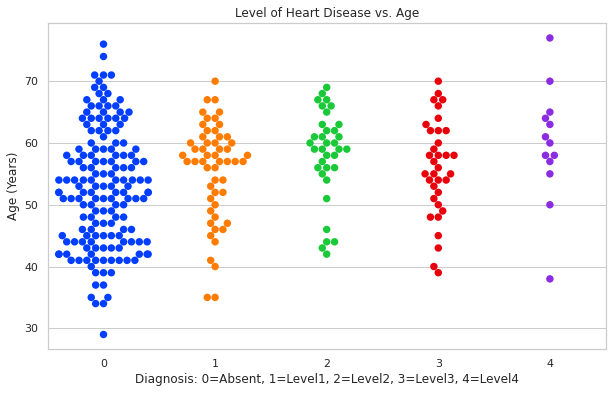

In [16]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='class', y='age', data=df, palette=palette, s = 7.472)
plt.xlabel('Diagnosis: 0=Absent, 1=Level1, 2=Level2, 3=Level3, 4=Level4')
plt.ylabel('Age (Years)')
plt.title('Level of Heart Disease vs. Age')
plt.show()

If we take a look at a swarmplot, the distribution makes more sense because we can see the number of patients in each category. 

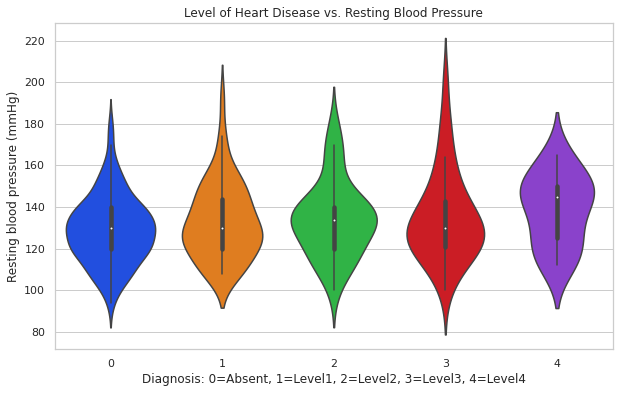

In [17]:
plt.figure(figsize=(10,6))
sns.violinplot(x='class', y='trestbps', data=df, palette=palette)
plt.xlabel('Diagnosis: 0=Absent, 1=Level1, 2=Level2, 3=Level3, 4=Level4')
plt.ylabel('Resting blood pressure (mmHg)')
plt.title('Level of Heart Disease vs. Resting Blood Pressure')
plt.show()

Let's take a look at the severity of heart disease and resting blood pressure.  Violin plots are similar to swarmplots but include the probability density. No diagnosis and level 2 look similar where level 3 is heavily skewed.  We may expect a shift for level 4 but we will see later if this feature has high importance.  

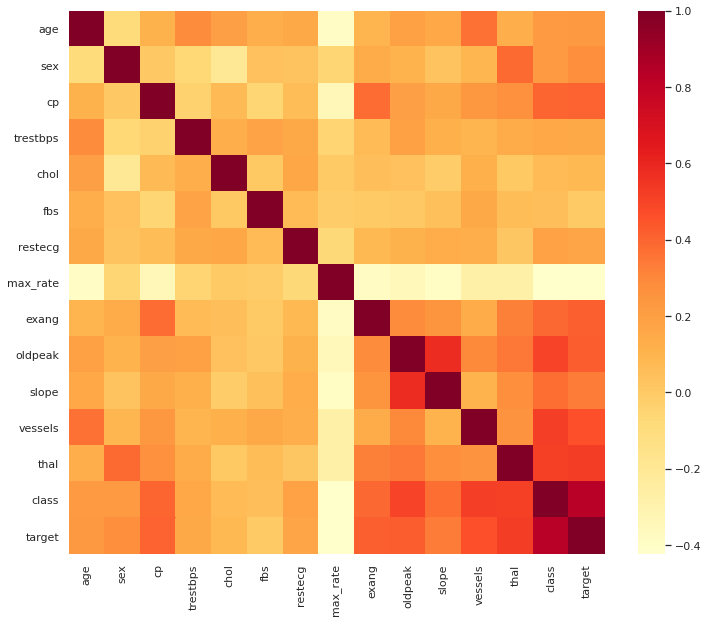

In [18]:
f, ax = plt.subplots(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap = 'YlOrRd')
plt.show()

Heat maps are important because they show the correlations with not only the target but with other variables in the data set.  Not a whole lot of light yellow and red but there is some.  Random Forests excel when there is a lot of correlation in a data set.  

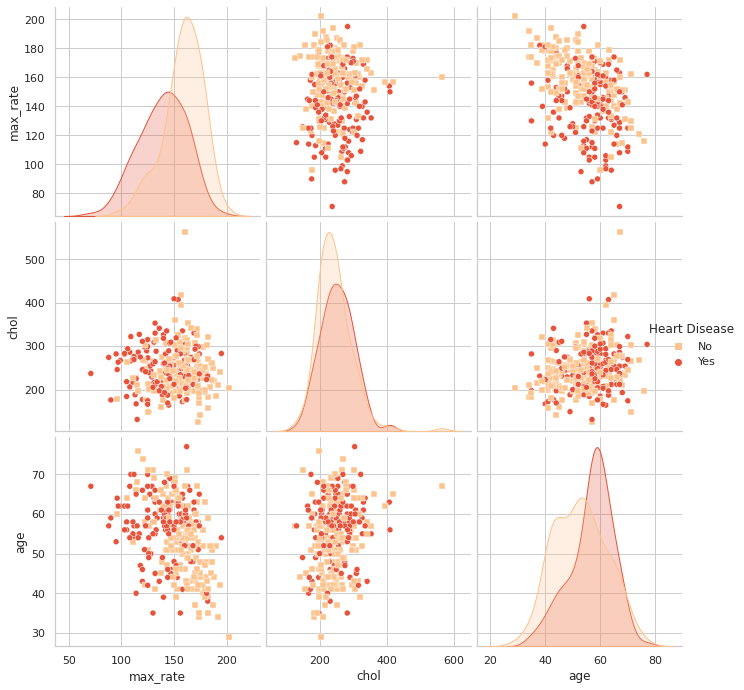

In [19]:
# Shows relationship between variables by target variable 
g = sns.pairplot(df, palette='OrRd', height=3.25, hue='target', 
                 markers=['s','o'], vars=['max_rate','chol','age'])

new_title = 'Heart Disease'
g._legend.set_title(new_title)

new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
   
plt.show()

It looks like there is some separation in diagnosis between age, choleserol and maximum heart rate in this pairplot, but maybe not much linearity.  Below is a closer look at maximum heart rate and age with respect to diagnosis in the form of a scatterplot.  Looks like most of the patients diagnosed with heart disease had higher maximum heart rates.  We will see if these features are important later.  

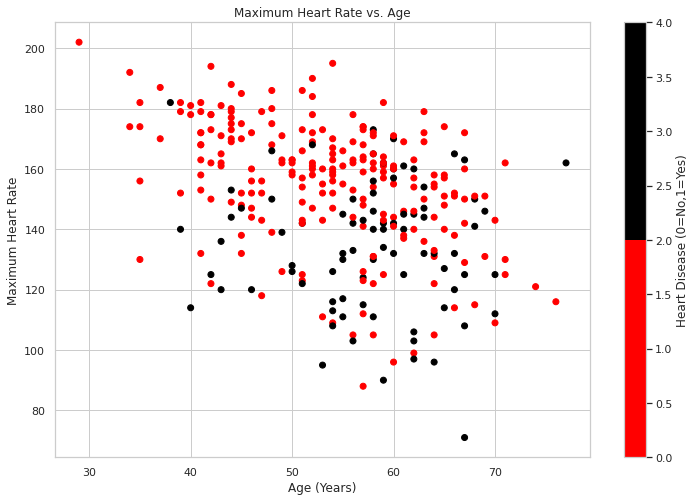

In [20]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12, 8)

ax1.set_xlabel('Age (Years)')
ax1.set_ylabel('Maximum Heart Rate')
ax1.set_title('Maximum Heart Rate vs. Age')

plt.scatter( df['age'], df['max_rate'] , c=df['class'],
            cmap=plt.cm.get_cmap('flag', 2))
cbar = plt.colorbar()
cbar.set_label('Heart Disease (0=No,1=Yes)')

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 
ax1.xaxis.set_major_formatter(tick) 

plt.show()

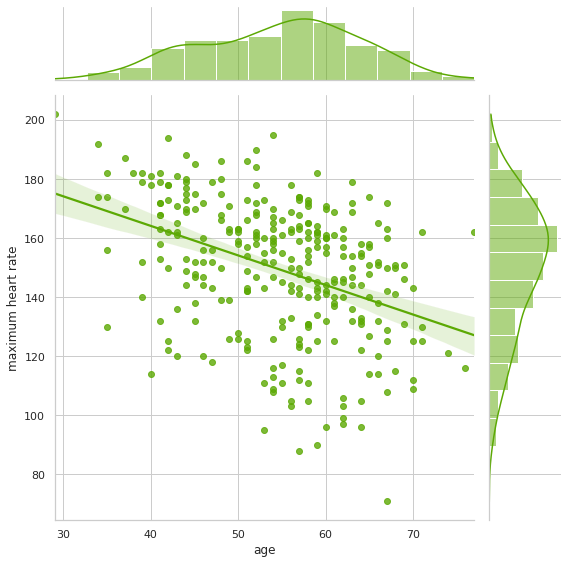

In [21]:
h = sns.jointplot(x='age', y='max_rate', data=df, kind='reg', height=8, color='xkcd:leaf green')
h.ax_joint.set_ylabel('maximum heart rate')
plt.show()

Maximum heart rate has a downward trend with age in this jointplot. Isn't that weird?

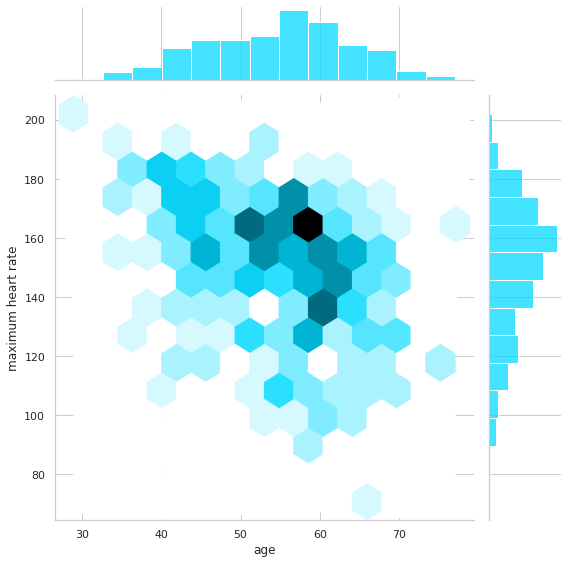

In [22]:
h = sns.jointplot(x='age',y='max_rate',data=df, kind='hex', color='xkcd:neon blue', height=8)
h.ax_joint.set_ylabel('maximum heart rate')
plt.show()

There is a peak at about 165 bpm and 57 years of age.  

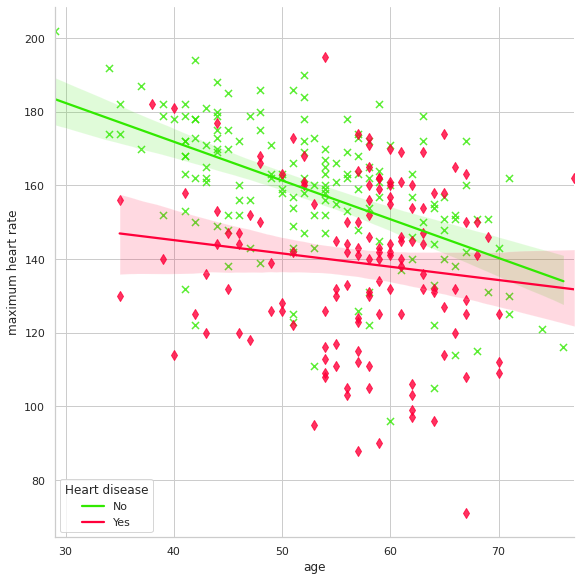

In [23]:
h = sns.lmplot(x='age', y='max_rate', data=df, hue='target', markers=['x','d'], scatter_kws={'s':50}, palette = 'prism', legend = False, height=8)
plt.legend(title='Heart disease', loc='lower left', labels=['No', 'Yes'])
h.set_ylabels('maximum heart rate')
plt.show()

This lmplot tells a slightly different story however, as there is not much trend for patients with heart disease as opposed to patients without heart disease.  

Below, we will see a histogram for every feature in the data set.  This is important because we can see if there are unusual distributions.  For instance, oldpeak is heavily sweked to the right, max_rate to the left and thal has values at 3 and 7 with a few at 6?  We may have some data wrangling and cleaning left to do. Also, we will most certainly have to scale the data.

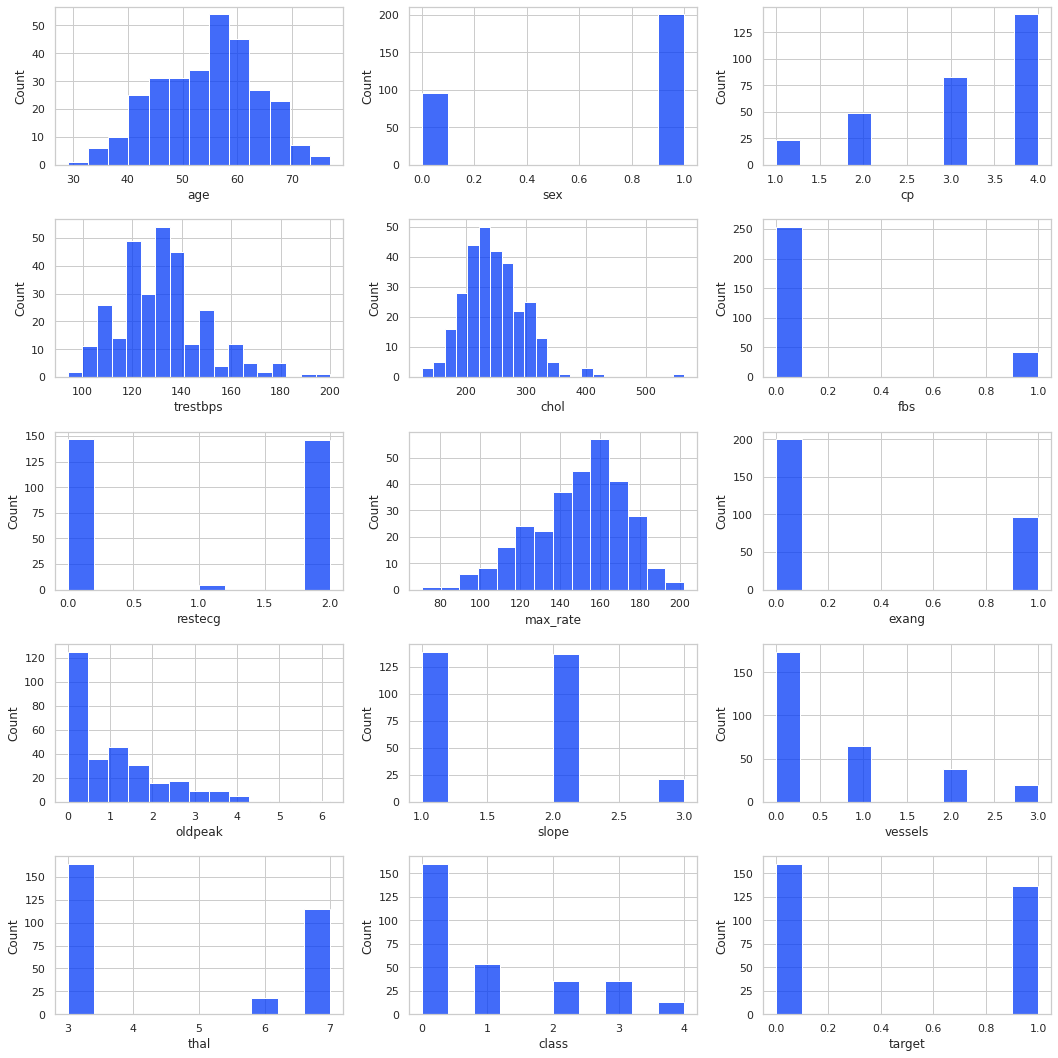

In [24]:
fig, axes = plt.subplots(nrows = 5, ncols = 3)    # axes is 2d array (5x3)
axes = axes.flatten()         # Convert axes to 1d array 
fig.set_size_inches(15, 15)

for ax, col in zip(axes, df.columns):
  sns.histplot(df[col], ax = ax, kde = False, color='xkcd:vibrant blue')
  plt.tight_layout(pad=1.5)

First, 'cp' has a distribution from 1 to 4.  We will change that from 0 to 3.  There may be more intuitive ways to do this with pandas and python but being thorough with data cleaning will lead to increased accuracies.  

Next, 'thal' has a strange concave distribution with values of 3, 6 and 7 which we need to change.  We will make the minimum concentration (6) a 1, the maximum concentration (3) a 2 and the balance a 3 to create a 'somewhat' normal distribution.

Lastly, we will change the "3" to a "0" in slope for a "somewhat" normal distribution.

In [25]:
df['cp'] = df['cp'].replace(to_replace=1,value=0)
df['cp'] = df['cp'].replace(to_replace=2,value=1)
df['cp'] = df['cp'].replace(to_replace=3,value=2)
df['cp'] = df['cp'].replace(to_replace=4,value=3)

In [26]:
df['thal'] = df['thal'].replace(to_replace=6,value=1)
df['thal'] = df['thal'].replace(to_replace=3,value=2)
df['thal'] = df['thal'].replace(to_replace=7,value=3)

In [27]:
df['slope'] = df['slope'].replace(to_replace=3,value=0)

Let's check the variance of our targets to see if we should normalize before preceding.

In [28]:
df.var()

age           81.897716
sex            0.219492
cp             0.930954
trestbps     315.517290
chol        2703.748589
fbs            0.124238
restecg        0.989853
max_rate     526.315270
exang          0.220675
oldpeak        1.359842
slope          0.380722
vessels        0.881654
thal           0.342297
class          1.524115
target         0.249340
dtype: float64

The variance of maximum heart rate, resting blood pressure and cholesterol are really high.  We should normalize these features before preceding.  

In [29]:
df['trestbps']=np.log(df['trestbps'])
df['chol']=np.log(df['chol'])
df['max_rate']=np.log(df['max_rate'])

np.var(df[["trestbps",'chol','max_rate']])

trestbps    0.017317
chol        0.041525
max_rate    0.027169
dtype: float64

Now all of the features have a reasonable variance.  

In [30]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,max_rate,exang,oldpeak,slope,vessels,thal,class,target
0,63,1,0,4.976734,5.451038,1,2,5.010635,0,2.3,0,0.0,1.0,0,0
1,67,1,3,5.075174,5.655992,0,2,4.682131,1,1.5,2,3.0,2.0,2,1
2,67,1,3,4.787492,5.433722,0,2,4.859812,1,2.6,2,2.0,3.0,1,1
3,37,1,2,4.867534,5.521461,0,0,5.231109,0,3.5,0,0.0,2.0,0,0
4,41,0,1,4.867534,5.318120,0,2,5.147494,0,1.4,1,0.0,2.0,0,0
5,56,1,1,4.787492,5.463832,0,0,5.181784,0,0.8,1,0.0,2.0,0,0
6,62,0,3,4.941642,5.590987,0,2,5.075174,0,3.6,0,2.0,2.0,3,1
7,57,0,3,4.787492,5.869297,0,0,5.093750,1,0.6,1,0.0,2.0,0,0
8,63,1,3,4.867534,5.537334,0,2,4.990433,0,1.4,2,1.0,3.0,2,1
9,53,1,3,4.941642,5.313206,1,2,5.043425,1,3.1,0,0.0,3.0,1,1


It appears as if the changes have taken place successfully.  We are now ready for data modeling.  

## **Modeling**

We will now begin the modeling stage where the target variable will be 'target' and all features of the data set will be used initially except for the 'class' variable, which will be dropped.  We want to start with a Random Forest so that we can have an understanding of our most important features.

In [31]:
features = ['age','sex','cp','trestbps','chol','fbs','restecg','max_rate','exang','slope','vessels','thal','oldpeak']

X = df[features]
y = df['target']

We are going to be doing some randomized search cross-validation and hyperparameter tuning so we should create a training and test set for this data.  We also will be perfomring stacking which means that we want a validation set that the second level stacking model has not seen.  We will want small test sets as a result.

In [32]:
seed = 2346

In [33]:
# Create temporary training and final testing datasets

X_temp, X_test, y_temp, y_test  =\
    train_test_split(X, y, test_size=0.15, random_state=seed)

# Create the final training and validation datasets
X_train, X_val, y_train, y_val =\
    train_test_split(X_temp, y_temp, test_size=0.20, random_state=seed)

#### **Random Forest**


Up first is the Random Forest Classifier which will not only give us a list of important features but it is insensitive to variance, the data does not need to be rescaled or transformed and can handle binary, categorical and numerical features.  We will run a test run to see what kind of accuracy and standard deviation we get.

In [34]:
rf = RandomForestClassifier(n_jobs=-1,
                            random_state=seed)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2346, verbose=0,
                       warm_start=False)

Here, we will use cross validation to see how much the accuracy improves and scale the data like we mentioned before with StandardScaler.

In [35]:
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy")
scores.mean(), scores.std()

(0.8209756097560975, 0.01774212127511441)

In [36]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
rf_scaled = RandomForestClassifier(n_jobs=-1,
                            random_state=seed)
rf_scaled.fit(X_train, y_train)

scores = cross_val_score(rf_scaled, X_train, y_train, cv=5, scoring="accuracy")
scores.mean(), scores.std()

(0.8209756097560975, 0.01774212127511441)

The accuracy and standard deviation did not change at all after scaling. Time to tune some hyperparameters.  The following is a function that will allow tuning for any kind of model with different cross-validation folds.  The parameters variable will allow different defined parameter ranges to be entered for each type of model.  Randomized search cross-validation is over 99% confident with 100 iterations.

In [38]:
def hyperparameter_tune(base_model, parameters, n_iter, k, X=X_train, y=y_train):
    start_time = time.time()
    
    optimal_model = RandomizedSearchCV(base_model,
                            param_distributions=parameters,
                            n_iter=n_iter,
                            cv=k,
                            n_jobs=-1,
                            random_state=seed)
    
    optimal_model.fit(X, y)
    
    stop_time = time.time()

    scores = cross_val_score(optimal_model, X, y, cv=k, scoring="accuracy")
    
    print("Elapsed Time:", time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print("====================")
    print("Cross Val Mean: {:.3f}, Cross Val Stdev: {:.3f}".format(scores.mean(), scores.std()))
    print("Best Score: {:.3f}".format(optimal_model.best_score_))
    print("Best Parameters: {}".format(optimal_model.best_params_))
    
    return optimal_model.best_params_, optimal_model.best_score_

The following are hyperparameters to be tuned for the Random Forest model which will be used with the hyperparameter tune function for the Random Forest model with 5-fold cross-validation.

In [39]:
parameters = {
    "max_depth": [3, 5, 10, None],
    "n_estimators": [100, 200, 300, 400, 500],
    "max_features": randint(1, 8),
    "criterion": ["gini", "entropy"],
    "bootstrap": [True, False],
    "min_samples_leaf": randint(1, 4)
}

best_params, best_score = hyperparameter_tune(rf_scaled, parameters, 100, 5, X_train, y_train)

Elapsed Time: 00:00:20
Cross Val Mean: 0.831, Cross Val Stdev: 0.042
Best Score: 0.866
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 3, 'n_estimators': 500}


This provides optimized hyperparameters for 5-fold cross-validation but how does the accuracy fluctuate for different numbers of folds?

In [ ]:
scores = []
folds = range(2, 11)

for i in folds:
    print("\ncv = ", i)
    best_params, best_score = hyperparameter_tune(rf_scaled, parameters, 100, i, X_train, y_train)
    scores.append(best_score)


cv =  2
Elapsed Time: 00:00:09
Cross Val Mean: 0.816, Cross Val Stdev: 0.024
Best Score: 0.856
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 1, 'n_estimators': 500}

cv =  3
Elapsed Time: 00:00:11
Cross Val Mean: 0.841, Cross Val Stdev: 0.037
Best Score: 0.861
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 2, 'n_estimators': 400}

cv =  4
Elapsed Time: 00:00:14
Cross Val Mean: 0.841, Cross Val Stdev: 0.025
Best Score: 0.856
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 3, 'n_estimators': 300}

cv =  5
Elapsed Time: 00:00:18
Cross Val Mean: 0.831, Cross Val Stdev: 0.042
Best Score: 0.866
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 3, 'n_estimators': 500}

cv =  6
Elapsed Time: 00:00:22
Cross Val Mean: 0.851

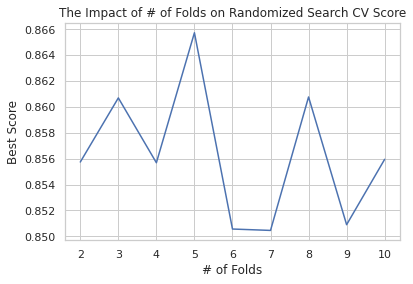

In [ ]:
plt.plot([x for x in folds], scores)
plt.xlabel("# of Folds")
plt.ylabel("Best Score")
plt.title("The Impact of # of Folds on Randomized Search CV Score")
plt.show()

This model is definitely most accurate with 5-fold cross-validation.  Time to check out the confusion matrix and classification report for the Random Forest Classifier.

In [40]:
rf_tuned = RandomForestClassifier(n_estimators=500, random_state = seed, min_samples_leaf = 3, max_features = 1, max_depth = 3, criterion = 'entropy', bootstrap = False)
rf_tuned.fit(X_train, y_train)
rf_predicted = rf_tuned.predict(X_test)
y_pred_prob = rf_tuned.predict_proba(X_test)

ac = accuracy_score(y_test, rf_predicted)

f1 = f1_score(y_test, rf_predicted, average='weighted')

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.844
Random Forest: f1-score=0.844


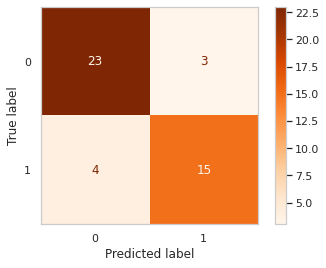

In [41]:
plot_confusion_matrix(rf_tuned, X_test, y_test, cmap = 'Oranges')
plt.grid(False)
plt.show()

In [42]:
print(classification_report(y_test, rf_predicted))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        26
           1       0.83      0.79      0.81        19

    accuracy                           0.84        45
   macro avg       0.84      0.84      0.84        45
weighted avg       0.84      0.84      0.84        45



Recall is especially important to this problem to elimiate Type II errors.  In other words, we want to reduce imforming patients that they do not have heart disease when they do.  Any error is important in the medical field so precision and f1 score should be monitored as well.  The model performed pretty well, but can we do better?   

#### **K-Nearest Neighbors Classifier**

In [43]:
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

With K-Nearest Neighbors, finding an ideal number for nearest neighbors is ideal for optimization.

In [44]:
test_scores.index(max(test_scores)) + 1

8

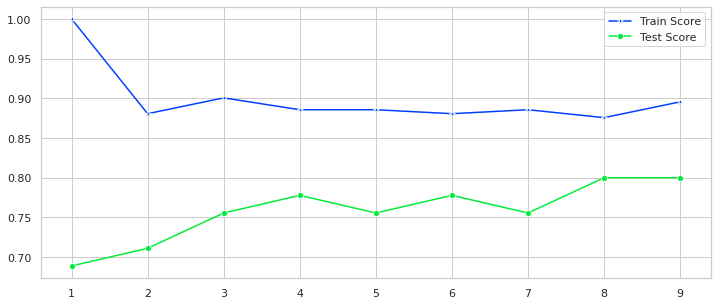

In [45]:
style.use('seaborn-bright')
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

It looks like 8 nearest neighbors is ideal but does the accuracy increase with even more neighbors? Let's see what the accuracy for the training set and test sets are and take a look at the confusion matrix and classification report and address cross-validation for this model.

In [46]:
knn = KNeighborsClassifier(8)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.8756218905472637
0.8


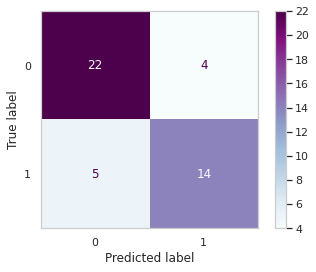

In [47]:
knn_predicted = knn.predict(X_test)

plot_confusion_matrix(knn, X_test, y_test, cmap = 'BuPu')
plt.grid(False)
plt.show()

In [48]:
knn_predicted = knn.predict(X_test)
print(classification_report(y_test, knn_predicted))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.78      0.74      0.76        19

    accuracy                           0.80        45
   macro avg       0.80      0.79      0.79        45
weighted avg       0.80      0.80      0.80        45



Hyperparameter tuning will be used to determine what hyperparameter is best overall with Randomized search cross-validation. 

In [49]:
param_grid = {'n_neighbors':np.arange(1,50), 'algorithm':['ball_tree', 'kd_tree', 'brute'], 'leaf_size':np.arange(20,100)}
knn = KNeighborsClassifier()

In [50]:
best_params, best_score = hyperparameter_tune(knn, param_grid, 100, 5, X_train, y_train)

Elapsed Time: 00:00:00
Cross Val Mean: 0.831, Cross Val Stdev: 0.033
Best Score: 0.851
Best Parameters: {'n_neighbors': 8, 'leaf_size': 72, 'algorithm': 'kd_tree'}


Next, we will run the K-Nearest Neighbors Classifier with the optimized hyperparameters and take a look at the accuracies for the training and test sets.

In [51]:
knn_tuned = KNeighborsClassifier(n_neighbors = 8, leaf_size = 72, algorithm = 'kd_tree')
knn_tuned.fit(X_train,y_train)
print(knn_tuned.score(X_train,y_train))
print(knn_tuned.score(X_test,y_test))

0.8756218905472637
0.8


The hyperparameter tuning also found 8 nearest neighbors at 5 folds but how does this model change with increasing folds?  We will start at 5 and go to 10 since we want at least 5 folds.

In [ ]:
scores = []
folds = range(5, 11)

for i in folds:
    print("\ncv = ", i)
    best_params, best_score = hyperparameter_tune(knn_tuned, param_grid, 100, i, X_train, y_train)
    scores.append(best_score)


cv =  5
Elapsed Time: 00:00:00
Cross Val Mean: 0.831, Cross Val Stdev: 0.033
Best Score: 0.851
Best Parameters: {'n_neighbors': 8, 'leaf_size': 72, 'algorithm': 'kd_tree'}

cv =  6
Elapsed Time: 00:00:00
Cross Val Mean: 0.821, Cross Val Stdev: 0.031
Best Score: 0.856
Best Parameters: {'n_neighbors': 7, 'leaf_size': 53, 'algorithm': 'ball_tree'}

cv =  7
Elapsed Time: 00:00:00
Cross Val Mean: 0.825, Cross Val Stdev: 0.079
Best Score: 0.845
Best Parameters: {'n_neighbors': 32, 'leaf_size': 70, 'algorithm': 'brute'}

cv =  8
Elapsed Time: 00:00:01
Cross Val Mean: 0.821, Cross Val Stdev: 0.056
Best Score: 0.851
Best Parameters: {'n_neighbors': 12, 'leaf_size': 55, 'algorithm': 'kd_tree'}

cv =  9
Elapsed Time: 00:00:00
Cross Val Mean: 0.826, Cross Val Stdev: 0.062
Best Score: 0.851
Best Parameters: {'n_neighbors': 12, 'leaf_size': 55, 'algorithm': 'kd_tree'}

cv =  10
Elapsed Time: 00:00:01
Cross Val Mean: 0.836, Cross Val Stdev: 0.066
Best Score: 0.856
Best Parameters: {'n_neighbors': 8,

It looks like 6 or 10 folds has the highest accuracy score so we will go with 10 here.

In [52]:
knn_tuned = KNeighborsClassifier(n_neighbors = 8, leaf_size = 72, algorithm = 'kd_tree')
knn_tuned.fit(X_train,y_train)
print(knn_tuned.score(X_train,y_train))
print(knn_tuned.score(X_test,y_test))

0.8756218905472637
0.8


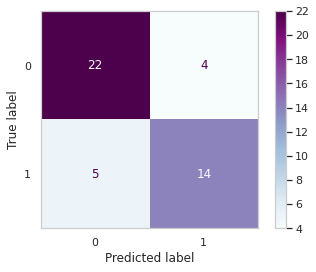

In [53]:
knn_predicted = knn_tuned.predict(X_test)

plot_confusion_matrix(knn_tuned, X_test, y_test, cmap = 'BuPu')
plt.grid(False)
plt.show()

In [54]:
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("Accuracy of K-Nearest Neighbors:",knn_acc_score*100,'\n')
print(classification_report(y_test, knn_predicted))

Accuracy of K-Nearest Neighbors: 80.0 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.78      0.74      0.76        19

    accuracy                           0.80        45
   macro avg       0.80      0.79      0.79        45
weighted avg       0.80      0.80      0.80        45



It looks like the model performed worse.  Let's move on to other models and see what the performance is like after taking a look at the ROC curve.

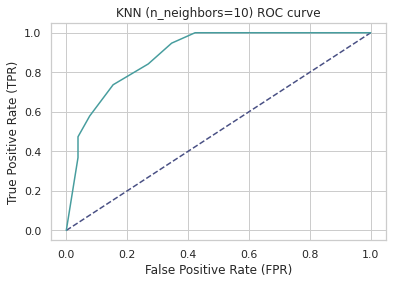

In [56]:
y_pred_proba = knn_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1], color='#495084', linestyle='--')
plt.plot(fpr,tpr, label='Knn', color='#479D9E')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('KNN (n_neighbors=8) ROC curve')
plt.show()

In [57]:
roc = roc_auc_score(y_test,y_pred_proba)
print('ROC Score: {:.2f}'.format(roc))

ROC Score: 0.89


Here, we will set up parameter grids for our other models, Light Gradient Boosting Machine, Logistic Regression and Support Vector Classifier, so that we can simply plug them into our hyperparameter tune function.

In [58]:
lgb_param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'num_leaves': [20, 25, 30, 35, 40, 45, 50, 55, 60],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]
}


lr_param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C': loguniform(1e-5, 100)
}

svc_param_grid = {
    'C': scipy.stats.expon(scale=.01),
    'gamma': scipy.stats.expon(scale=.01),
    'kernel': ['linear', 'rbf', 'poly'],
    'class_weight': [{0: 0.01}, {1: 1}, {1: 2}, {1: 10}, {1: 50}, 'balanced']
}

#### **Light Gradient Boosting Machine**


In [59]:
ltgb = lgb.LGBMClassifier(learning_rate=0.01, n_estimators=100, max_depth=15,subsample=0.52,colsample_bytree=0.6,seed=seed, 
                    reg_lambda=2, min_child_weight = 0.5, num_leaves=40)

best_params, best_score = hyperparameter_tune(ltgb, lgb_param_grid, 100, 8, X_train, y_train)



Elapsed Time: 00:00:01
Cross Val Mean: 0.836, Cross Val Stdev: 0.098
Best Score: 0.856
Best Parameters: {'subsample': 0.7, 'silent': False, 'reg_lambda': 100.0, 'num_leaves': 20, 'n_estimators': 100, 'min_child_weight': 3.0, 'max_depth': 15, 'learning_rate': 0.1, 'colsample_bytree': 0.4}


The process will be the same here.  Optimization of the model hyperparameters and execution of an optimized function leading to a new confusion matrix and classification report.

In [60]:
ltgb_tuned = lgb.LGBMClassifier(learning_rate=0.1, n_estimators=100, max_depth=15, subsample=0.7,colsample_bytree=0.4,seed=seed, 
                    reg_lambda=100, colsample_bylevel=0.8, min_child_weight = 3, num_leaves=20)
ltgb_tuned.fit(X_train,y_train)
print(ltgb_tuned.score(X_train,y_train))
print(ltgb_tuned.score(X_test,y_test))

ltgb_tuned.fit(X_train, y_train)

0.8805970149253731
0.8444444444444444


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bylevel=0.8,
               colsample_bytree=0.4, importance_type='split', learning_rate=0.1,
               max_depth=15, min_child_samples=20, min_child_weight=3,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=20,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=100,
               seed=2346, silent=True, subsample=0.7, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
scores = []
folds = range(5, 11)

for i in folds:
    print("\ncv = ", i)
    best_params, best_score = hyperparameter_tune(ltgb_tuned, lgb_param_grid, 100, i, X_train, y_train)
    scores.append(best_score)


cv =  5
Elapsed Time: 00:00:00
Cross Val Mean: 0.836, Cross Val Stdev: 0.012
Best Score: 0.856
Best Parameters: {'subsample': 1.0, 'silent': False, 'reg_lambda': 5.0, 'num_leaves': 50, 'n_estimators': 100, 'min_child_weight': 7.0, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

cv =  6
Elapsed Time: 00:00:01
Cross Val Mean: 0.826, Cross Val Stdev: 0.025
Best Score: 0.876
Best Parameters: {'subsample': 0.7, 'silent': False, 'reg_lambda': 1.0, 'num_leaves': 35, 'n_estimators': 100, 'min_child_weight': 7.0, 'max_depth': 15, 'learning_rate': 0.1, 'colsample_bytree': 0.5}

cv =  7
Elapsed Time: 00:00:01
Cross Val Mean: 0.826, Cross Val Stdev: 0.074
Best Score: 0.861
Best Parameters: {'subsample': 0.7, 'silent': False, 'reg_lambda': 10.0, 'num_leaves': 55, 'n_estimators': 100, 'min_child_weight': 5.0, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 0.7}

cv =  8
Elapsed Time: 00:00:01
Cross Val Mean: 0.836, Cross Val Stdev: 0.098
Best Score: 0.856
Best Parameters

The light gradient boosting machine also performed best with 6 folds.  

In [61]:
ltgb_tuned = lgb.LGBMClassifier(learning_rate=0.1, n_estimators=100, max_depth=15,gamma=0, subsample=0.7,colsample_bytree=0.5,seed=seed, 
                    reg_lambda=1, colsample_bylevel=0.8, min_child_weight = 7, num_leaves=35)
ltgb_tuned.fit(X_train,y_train)
print(ltgb_tuned.score(X_train,y_train))
print(ltgb_tuned.score(X_test,y_test))

0.9154228855721394
0.8


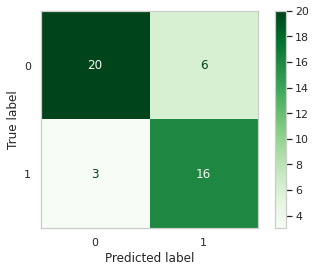

Accuracy of Light Gradient Boosting Machine: 80.0 

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.73      0.84      0.78        19

    accuracy                           0.80        45
   macro avg       0.80      0.81      0.80        45
weighted avg       0.81      0.80      0.80        45



In [62]:
ltgb_predicted = ltgb_tuned.predict(X_test)

plot_confusion_matrix(ltgb_tuned, X_test, y_test, cmap = 'Greens')
plt.grid(False)
plt.show()

ltgb_acc_score = accuracy_score(y_test, ltgb_predicted)

print("Accuracy of Light Gradient Boosting Machine:",ltgb_acc_score*100,'\n')
print(classification_report(y_test,ltgb_predicted))

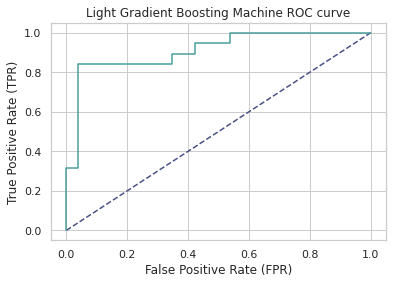

In [63]:
y_pred_proba = ltgb_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1], color='#495084', linestyle='--')
plt.plot(fpr,tpr, label='ltgb', color='#479D9E')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Light Gradient Boosting Machine ROC curve')
plt.show()

In [64]:
roc = roc_auc_score(y_test,y_pred_proba)
print('ROC Score: {:.2f}'.format(roc))

ROC Score: 0.91


It looks like Random Forest may be the best model we have yet.  Let's give AdaBoost a shot.  AdaBoost is best used to boost the performance of decision trees on binary classification problems.  AdaBoost is another boosting algorithm that can be used to boost the performance of any other machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem. AdaBoost has only one real hyperparameter which is learning rate and we will explore it here.

### **AdaBoost**

In [65]:
ada = AdaBoostClassifier(n_estimators=100)

best_params, best_score = hyperparameter_tune(ada, {'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3]}, 100, 6, X_train, y_train)

Elapsed Time: 00:00:00
Cross Val Mean: 0.806, Cross Val Stdev: 0.042
Best Score: 0.826
Best Parameters: {'learning_rate': 0.01}


In [66]:
ada_tuned = AdaBoostClassifier(n_estimators=100, learning_rate = 0.01)

ada_tuned.fit(X_train,y_train)
print(ada_tuned.score(X_train,y_train))
print(ada_tuned.score(X_test,y_test))

ada_tuned.fit(X_train, y_train)

0.845771144278607
0.8222222222222222


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=100, random_state=None)

In [67]:
scores = []
folds = range(5, 11)

for i in folds:
    print("\ncv = ", i)
    best_params, best_score = hyperparameter_tune(ada_tuned, {'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3]}, 100, i, X_train, y_train)
    scores.append(best_score)


cv =  5
Elapsed Time: 00:00:00
Cross Val Mean: 0.796, Cross Val Stdev: 0.051
Best Score: 0.816
Best Parameters: {'learning_rate': 0.01}

cv =  6
Elapsed Time: 00:00:00
Cross Val Mean: 0.806, Cross Val Stdev: 0.042
Best Score: 0.826
Best Parameters: {'learning_rate': 0.01}

cv =  7
Elapsed Time: 00:00:00
Cross Val Mean: 0.821, Cross Val Stdev: 0.035
Best Score: 0.821
Best Parameters: {'learning_rate': 0.2}

cv =  8
Elapsed Time: 00:00:00
Cross Val Mean: 0.836, Cross Val Stdev: 0.061
Best Score: 0.826
Best Parameters: {'learning_rate': 0.01}

cv =  9
Elapsed Time: 00:00:00
Cross Val Mean: 0.776, Cross Val Stdev: 0.068
Best Score: 0.821
Best Parameters: {'learning_rate': 0.2}

cv =  10
Elapsed Time: 00:00:00
Cross Val Mean: 0.806, Cross Val Stdev: 0.064
Best Score: 0.831
Best Parameters: {'learning_rate': 0.1}


In [68]:
ada_tuned = AdaBoostClassifier(n_estimators=100, learning_rate = 0.1)
ada_tuned.fit(X_train,y_train)
print(ada_tuned.score(X_train,y_train))
print(ada_tuned.score(X_test,y_test))

0.8805970149253731
0.8444444444444444


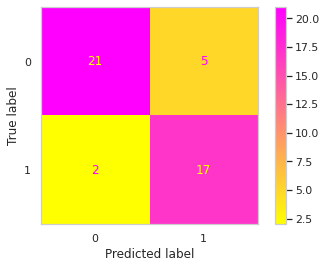

Accuracy of Adaboost: 84.44444444444444 

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.77      0.89      0.83        19

    accuracy                           0.84        45
   macro avg       0.84      0.85      0.84        45
weighted avg       0.85      0.84      0.85        45



In [85]:
ada_predicted = ada_tuned.predict(X_test)

plot_confusion_matrix(ada_tuned, X_test, y_test, cmap = 'spring_r')
plt.grid(False)
plt.show()

ada_acc_score = accuracy_score(y_test, ada_predicted)

print("Accuracy of Adaboost:",ada_acc_score*100,'\n')
print(classification_report(y_test,ada_predicted))

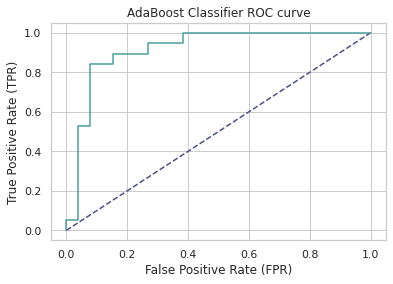

In [86]:
y_pred_proba = ada_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1], color='#495084', linestyle='--')
plt.plot(fpr,tpr, label='ada', color='#479D9E')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AdaBoost Classifier ROC curve')
plt.show()

In [87]:
roc = roc_auc_score(y_test,y_pred_proba)
print('ROC Score: {:.2f}'.format(roc))

ROC Score: 0.91


Not a bad performance from AdaBoost which specializes in these situations, but it is about the same as the Random Forest Classifier.  We have a few more models to try.

#### **Support Vector Classifier**

In [88]:
svc =  SVC(kernel='rbf', C=2)

best_params, best_score = hyperparameter_tune(svc, svc_param_grid, 100, 6, X_train, y_train)

Elapsed Time: 00:00:02
Cross Val Mean: 0.850, Cross Val Stdev: 0.036
Best Score: 0.851
Best Parameters: {'C': 0.0023656433581796137, 'class_weight': 'balanced', 'gamma': 0.009336929186104403, 'kernel': 'linear'}


In [89]:
svc_tuned =  SVC(kernel='linear', C=0.0023656433581796137, gamma = 0.009336929186104403, class_weight = 'balanced', probability=True)

svc_tuned.fit(X_train,y_train)
print(svc_tuned.score(X_train,y_train))
print(svc_tuned.score(X_test,y_test))

svc_tuned.fit(X_train, y_train)


0.8557213930348259
0.8222222222222222


SVC(C=0.0023656433581796137, break_ties=False, cache_size=200,
    class_weight='balanced', coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.009336929186104403, kernel='linear', max_iter=-1, probability=True,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [91]:
scores = []
folds = range(5, 11)

for i in folds:
    print("\ncv = ", i)
    best_params, best_score = hyperparameter_tune(svc_tuned, svc_param_grid, 100, i, X_train, y_train)
    scores.append(best_score)


cv =  5
Elapsed Time: 00:00:01
Cross Val Mean: 0.846, Cross Val Stdev: 0.033
Best Score: 0.851
Best Parameters: {'C': 0.0044234436400303325, 'class_weight': {1: 1}, 'gamma': 0.0009223366010171285, 'kernel': 'linear'}

cv =  6
Elapsed Time: 00:00:01
Cross Val Mean: 0.850, Cross Val Stdev: 0.036
Best Score: 0.851
Best Parameters: {'C': 0.0023656433581796137, 'class_weight': 'balanced', 'gamma': 0.009336929186104403, 'kernel': 'linear'}

cv =  7
Elapsed Time: 00:00:01
Cross Val Mean: 0.850, Cross Val Stdev: 0.067
Best Score: 0.855
Best Parameters: {'C': 0.0033768872991782797, 'class_weight': 'balanced', 'gamma': 0.006012175948218119, 'kernel': 'linear'}

cv =  8
Elapsed Time: 00:00:01
Cross Val Mean: 0.851, Cross Val Stdev: 0.039
Best Score: 0.851
Best Parameters: {'C': 0.0023656433581796137, 'class_weight': 'balanced', 'gamma': 0.009336929186104403, 'kernel': 'linear'}

cv =  9
Elapsed Time: 00:00:01
Cross Val Mean: 0.841, Cross Val Stdev: 0.057
Best Score: 0.851
Best Parameters: {'C': 

In [92]:
svc_tuned = SVC(kernel='linear', C=0.03873061454529657, gamma = 0.00010639445263735861, class_weight = {1: 1}, probability=True)
svc_tuned.fit(X_train,y_train)
print(svc_tuned.score(X_train,y_train))
print(svc_tuned.score(X_test,y_test))

0.8805970149253731
0.9111111111111111


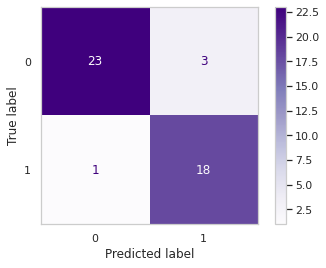

Accuracy of Support Vector Machine: 91.11111111111111 

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.86      0.95      0.90        19

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45



In [93]:
svc_predicted = svc_tuned.predict(X_test)

plot_confusion_matrix(svc_tuned, X_test, y_test, cmap = 'Purples')
plt.grid(False)
plt.show()

svc_acc_score = accuracy_score(y_test, svc_predicted)

print("Accuracy of Support Vector Machine:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

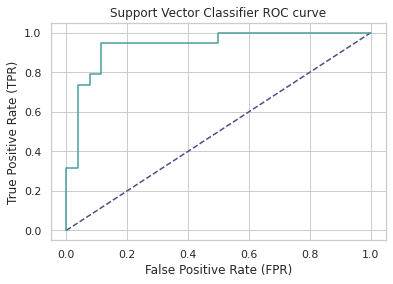

In [94]:
y_pred_proba = svc_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1], color='#495084', linestyle='--')
plt.plot(fpr,tpr, label='svc', color='#479D9E')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Support Vector Classifier ROC curve')
plt.show()

In [95]:
roc = roc_auc_score(y_test,y_pred_proba)
print('ROC Score: {:.2f}'.format(roc))

ROC Score: 0.94


The Support Vector Classifier has the highest accuracy so far.  It could be because Randomized Search cross-validation allows a search through a range of values and not just a concrete list.  Up next, Logistic Regression.

#### **Logistic Regresssion**

In [96]:
lr = LogisticRegression()

best_params, best_score = hyperparameter_tune(lr, lr_param_grid, 100, 6, X_train, y_train)

Elapsed Time: 00:00:01
Cross Val Mean: 0.836, Cross Val Stdev: 0.041
Best Score: 0.851
Best Parameters: {'C': 1.344866787847175, 'penalty': 'l2', 'solver': 'newton-cg'}


In [97]:
lr_tuned =  LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 1.344866787847175)

lr_tuned.fit(X_train,y_train)
print(lr_tuned.score(X_train,y_train))
print(lr_tuned.score(X_test,y_test))

lr_tuned.fit(X_train, y_train)


0.8805970149253731
0.8444444444444444


LogisticRegression(C=1.344866787847175, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
scores = []
folds = range(5, 11)

for i in folds:
    print("\ncv = ", i)
    best_params, best_score = hyperparameter_tune(lr_tuned, lr_param_grid, 100, i, X_train, y_train)
    scores.append(best_score)


cv =  5
Elapsed Time: 00:00:00
Cross Val Mean: 0.826, Cross Val Stdev: 0.034
Best Score: 0.851
Best Parameters: {'C': 0.011184349725503603, 'penalty': 'l2', 'solver': 'lbfgs'}

cv =  6
Elapsed Time: 00:00:01
Cross Val Mean: 0.836, Cross Val Stdev: 0.041
Best Score: 0.851
Best Parameters: {'C': 1.344866787847175, 'penalty': 'l2', 'solver': 'newton-cg'}

cv =  7
Elapsed Time: 00:00:01
Cross Val Mean: 0.831, Cross Val Stdev: 0.063
Best Score: 0.855
Best Parameters: {'C': 0.011184349725503603, 'penalty': 'l2', 'solver': 'lbfgs'}

cv =  8
Elapsed Time: 00:00:01
Cross Val Mean: 0.846, Cross Val Stdev: 0.046
Best Score: 0.846
Best Parameters: {'C': 0.14558213083887184, 'penalty': 'l2', 'solver': 'newton-cg'}

cv =  9
Elapsed Time: 00:00:01
Cross Val Mean: 0.831, Cross Val Stdev: 0.058
Best Score: 0.851
Best Parameters: {'C': 0.011184349725503603, 'penalty': 'l2', 'solver': 'lbfgs'}

cv =  10
Elapsed Time: 00:00:01
Cross Val Mean: 0.846, Cross Val Stdev: 0.047
Best Score: 0.856
Best Parameter

In [99]:
lr_tuned = LogisticRegression(solver = 'saga', penalty = 'l2', C = 0.19312233706994503)
lr_tuned.fit(X_train,y_train)
print(lr_tuned.score(X_train,y_train))
print(lr_tuned.score(X_test,y_test))

0.8706467661691543
0.8444444444444444


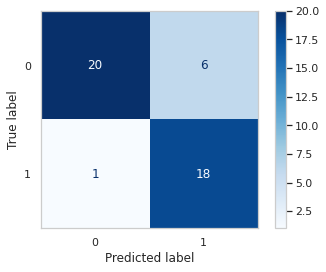

Accuracy of Logistic Regression: 84.44444444444444 

              precision    recall  f1-score   support

           0       0.95      0.77      0.85        26
           1       0.75      0.95      0.84        19

    accuracy                           0.84        45
   macro avg       0.85      0.86      0.84        45
weighted avg       0.87      0.84      0.85        45



In [100]:
lr_predict = lr_tuned.predict(X_test)

plot_confusion_matrix(lr_tuned, X_test, y_test, cmap = 'Blues')
plt.grid(False)
plt.show()

lr_acc_score = accuracy_score(y_test, lr_predict)

print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

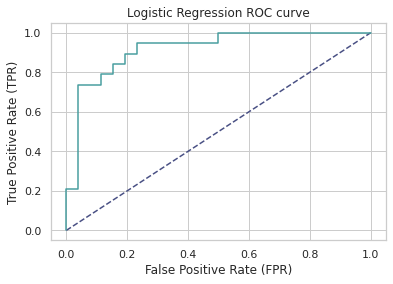

In [101]:
y_pred_proba = lr_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1], color='#495084', linestyle='--')
plt.plot(fpr,tpr, label='lr', color='#479D9E')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Logistic Regression ROC curve')
plt.show()

In [102]:
roc = roc_auc_score(y_test,y_pred_proba)
print('ROC Score: {:.2f}'.format(roc))

ROC Score: 0.92


Logistic Regression performed about the same as AdaBoost and the Random Forest Classifier.  We still have one more model to try.

#### **Naive Bayes**


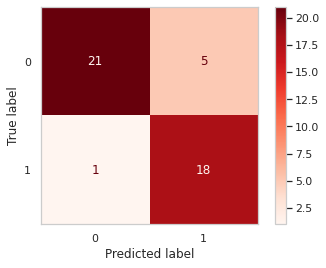

In [103]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)

plot_confusion_matrix(nb, X_test, y_test, cmap = 'Reds')
plt.grid(False)
plt.show()

In [104]:
nb_acc_score = accuracy_score(y_test, nbpred)

print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

Accuracy of Naive Bayes model: 86.66666666666667 

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.78      0.95      0.86        19

    accuracy                           0.87        45
   macro avg       0.87      0.88      0.87        45
weighted avg       0.88      0.87      0.87        45



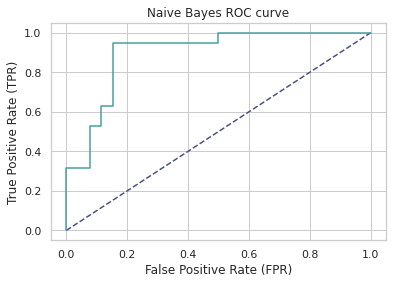

In [105]:
y_pred_proba = nb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1], color='#495084', linestyle='--')
plt.plot(fpr,tpr, label='nb', color='#479D9E')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Naive Bayes ROC curve')
plt.show()

In [106]:
roc = roc_auc_score(y_test,y_pred_proba)
print('ROC Score: {:.2f}'.format(roc))

ROC Score: 0.90


The last three models have all performed great!  Naive Bayes beat out all but one model, the Support Vector Classifier.  But can we do better?

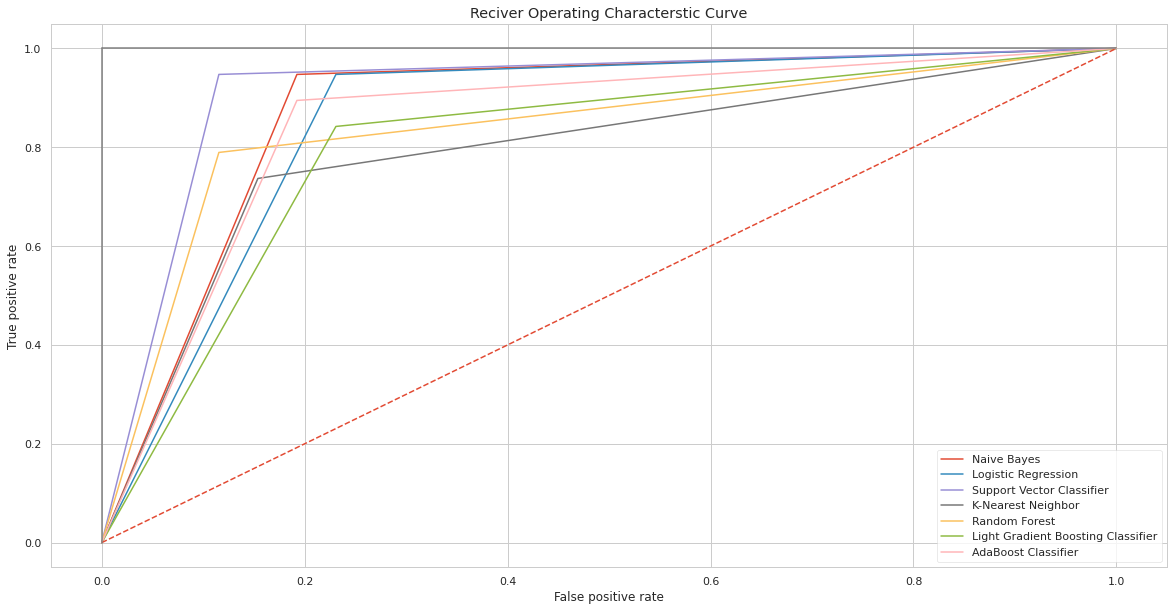

In [107]:
style.use('ggplot')

lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
ltgb_false_positive_rate,ltgb_true_positive_rate,ltgb_threshold = roc_curve(y_test,ltgb_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test, rf_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
ada_false_positive_rate,ada_true_positive_rate,ada_threshold = roc_curve(y_test,ada_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(ltgb_false_positive_rate,ltgb_true_positive_rate,label='Light Gradient Boosting Classifier')
plt.plot(ada_false_positive_rate,ada_true_positive_rate,label='AdaBoost Classifier')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='0.5')
plt.plot([1,1],c='0.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.draw()

In [108]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Light Gradient Boost',
                    'K-Nearest Neighbors','Support Vector Machine', 'AdaBoost'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,ac*100,ltgb_acc_score*100,knn_acc_score*100,svc_acc_score*100,ada_acc_score*100]})
final = model_ev.to_string(index=False)
print(final)

                  Model   Accuracy
    Logistic Regression  84.444444
            Naive Bayes  86.666667
          Random Forest  84.444444
   Light Gradient Boost  80.000000
    K-Nearest Neighbors  80.000000
 Support Vector Machine  91.111111
               AdaBoost  84.444444


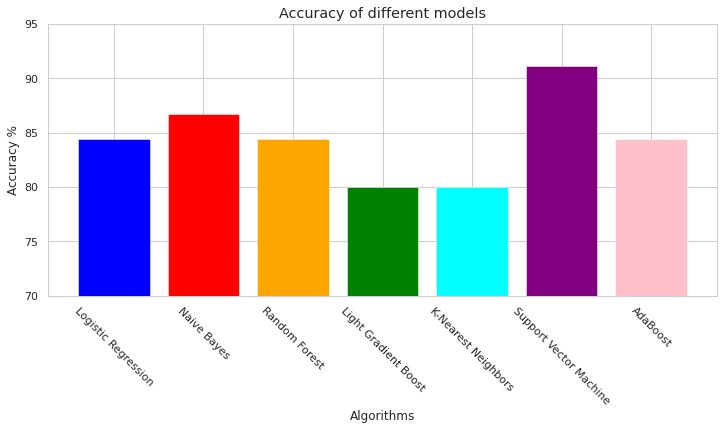

In [109]:
style.use('seaborn-bright')
colors = ['blue', 'red', 'orange', 'green', 'cyan', 'purple', 'pink']
plt.figure(figsize=(12,5))
plt.title("Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation=-45)
plt.ylim(70, 95)
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

The Support Vector Classifier has performed the best in accuracy, precision and recall and Naive Bayes performed really well falling just behind.  The Naive Bayes Classifers don't offer an intrinsic method to evaluate feature importances. Naïve Bayes methods work by determining the conditional and unconditional probabilities associated with the features and predict the class with the highest probability. Thus, there are no coefficients computed or associated with the features you used to train the model. K-nearest neighbors does not have a such attribute either but the accuracy here was really bad. Fortunately, Support Vector Machines do have an attribute if a linear kernel is used.   

In [110]:
rf_features = rf_tuned.feature_importances_
ada_features = ada_tuned.feature_importances_
ltgb_features = ltgb_tuned.feature_importances_
lr_features = lr_tuned.coef_.ravel()
svc_features = svc_tuned.coef_.ravel()

Now, we will create a dictionary so that we can read values into a plot of the average (mean) feature importance for these models that order their features.

In [111]:
cols = X.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
      'AdaBoost feature importances': ada_features,
      'Light Gradient Boosting Machine feature importances': ltgb_features,
    'Logistic regression feature importances': lr_features,
    'Support Vector Machine' : svc_features
    })

<Figure size 432x288 with 0 Axes>

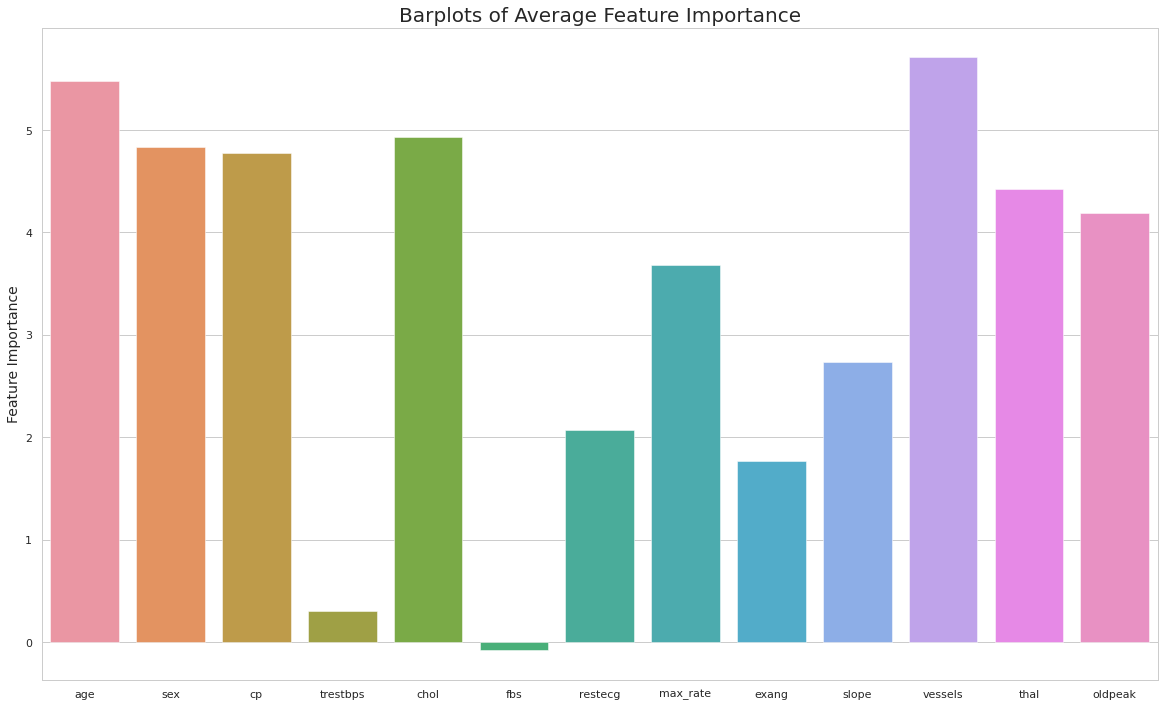

In [112]:
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1)

yy = feature_dataframe['mean'].values
xx = feature_dataframe['features'].values

plt.figure(facecolor="white")
fig = plt.figure(figsize=(20,12))
sns.barplot(y=yy, x=xx)
plt.title('Barplots of Average Feature Importance', size = 20)
plt.ylabel('Feature Importance', size=14)
plt.show()

This is a plot of the average feature importances over most of our models except for Logistic Regression and Naive Bayes which both performed well.  We will take a look at this further later. For now, age, cholesterol, chest pain, the number of vessels colored with fluorosopy and thalassemia look pretty important.

Now, we will see if we can add some of these models together to get even higher accuracy.

In [113]:
sclf = StackingClassifier(classifiers = [lr_tuned, svc_tuned],
                            meta_classifier = lgb.LGBMClassifier())

In [114]:
sclf.fit(X_val, y_val)

StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=0.19312233706994503,
                                                   class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='saga', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                SVC(C=0.03873061454529657, break_ties=False,
                       

In [115]:
sclf_predict = sclf.predict(X_test)

In [116]:
sclf_acc_score = accuracy_score(y_test, sclf_predict)

print("Accuracy of Stacked Classifier model:",sclf_acc_score*100,'\n')
print(classification_report(y_test, sclf_predict))

Accuracy of Stacked Classifier model: 82.22222222222221 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        26
           1       0.82      0.74      0.78        19

    accuracy                           0.82        45
   macro avg       0.82      0.81      0.81        45
weighted avg       0.82      0.82      0.82        45



Stacking did not improve the model accuracy as there may have not been enough data for the classifier to learn from.  Let's go about this in a different way. We will start with XGBoost using similar hyperparameters as the Light Gradient Boosting Machine.  First, we will drop 'fbs' since the feature importance was low on the average of 5 different models.

## **Model Evaluation with XGBoost**

We will add back the original values for graphing purposes.  We have a really good predictor with the Support Vector Classifier but we need a really good tree model to tell the story of heart disease.  Enter **XGBoost**

In [147]:
df['trestbps']=np.exp(df['trestbps'])
df['max_rate']=np.exp(df['max_rate'])

In [148]:
features = ['age','sex','cp', 'trestbps', 'chol','restecg','max_rate','exang','slope','vessels','thal','oldpeak']

X_new = df[features]
y_new = df['target']

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.25)

In [149]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=15, subsample=0.7,colsample_bytree=0.4,seed=seed, 
                    reg_lambda=100, colsample_bylevel=0.8, min_child_weight = 3)

We will once again look for the best hyperparameters for the best model we can get with our hyperparameter tune function.

In [150]:
xgb_param_grid = {
        'silent': [False],
        'n_estimators': [100, 300, 500],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0]    
}

In [151]:
scores = []
folds = range(5, 11)

for i in folds:
    print("\ncv = ", i)
    best_params, best_score = hyperparameter_tune(xgb, xgb_param_grid, 100, i, X_train, y_train)
    scores.append(best_score)


cv =  5
Elapsed Time: 00:00:03
Cross Val Mean: 0.806, Cross Val Stdev: 0.022
Best Score: 0.851
Best Parameters: {'subsample': 0.8, 'silent': False, 'reg_lambda': 100.0, 'n_estimators': 300, 'min_child_weight': 0.5, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.5}

cv =  6
Elapsed Time: 00:00:01
Cross Val Mean: 0.811, Cross Val Stdev: 0.056
Best Score: 0.851
Best Parameters: {'subsample': 0.8, 'silent': False, 'reg_lambda': 0.1, 'n_estimators': 300, 'min_child_weight': 0.5, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.7}

cv =  7
Elapsed Time: 00:00:02
Cross Val Mean: 0.824, Cross Val Stdev: 0.069
Best Score: 0.847
Best Parameters: {'subsample': 0.9, 'silent': False, 'reg_lambda': 5.0, 'n_estimators': 500, 'min_child_weight': 0.5, 'max_depth': 6, 'learning_rate': 0.001, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.9}

cv =  8
Elapsed Time: 00:00:02
Cross Val Mean: 0.815, Cross Val Stdev: 0.048
Best Sc

In [155]:
xgb_tuned = XGBClassifier(learning_rate=0.2, n_estimators=300, max_depth=10, subsample=0.8,colsample_bytree=0.4,seed=seed, 
                    reg_lambda=100, colsample_bylevel=0.5, min_child_weight = 0.5)

In [156]:
xgb_tuned.fit(X_train,y_train)
print(xgb_tuned.score(X_train,y_train))
print(xgb_tuned.score(X_test,y_test))

0.9144144144144144
0.8266666666666667


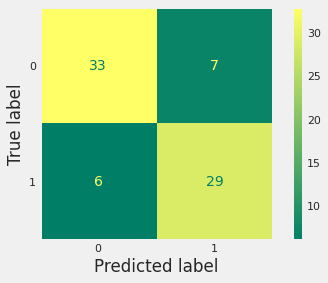

Accuracy of Extreme Gradient Boosting Machine(XGBoost): 82.66666666666667 

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        40
           1       0.81      0.83      0.82        35

    accuracy                           0.83        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



In [157]:
xgb_predicted = xgb_tuned.predict(X_test)

plot_confusion_matrix(xgb_tuned, X_test, y_test, cmap = 'summer')
plt.grid(False)
plt.show()

xgb_acc_score = accuracy_score(y_test, xgb_predicted)

print("Accuracy of Extreme Gradient Boosting Machine(XGBoost):",xgb_acc_score*100,'\n')
print(classification_report(y_test, xgb_predicted))

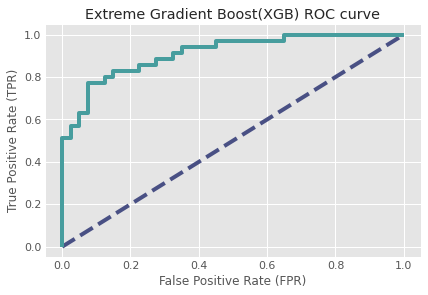

In [159]:
y_pred_proba = xgb_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1], color='#495084', linestyle='--')
plt.plot(fpr,tpr, label='xgb', color='#479D9E')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Extreme Gradient Boost(XGB) ROC curve')
plt.show()

In [160]:
roc = roc_auc_score(y_test,y_pred_proba)
print('ROC Score: {:.2f}'.format(roc))

ROC Score: 0.91


XGBoost did not come through as expected but still may be able to shed some light on the story behind heart disease.  

In [391]:
style.use('fivethirtyeight')
perm = PermutationImportance(xgb_tuned, random_state=seed).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_new.columns.tolist())

Weight,Feature
0.0800 ± 0.0446,cp
0.0800 ± 0.0735,vessels
0.0373 ± 0.0662,oldpeak
0.0373 ± 0.0569,thal
0.0187 ± 0.0362,trestbps
0.0133 ± 0.0377,sex
0.0133 ± 0.0292,slope
0.0053 ± 0.0272,chol
0.0000 ± 0.0292,max_rate
-0.0027 ± 0.0200,restecg


The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.  It is no surprise that chest pain, thalassemia, the number of vessels colored with fluorosopy and ST depression induced by exercise relative to rest are important to the model.  It is somewhat of a surprise that max_rate is middle of the pack.

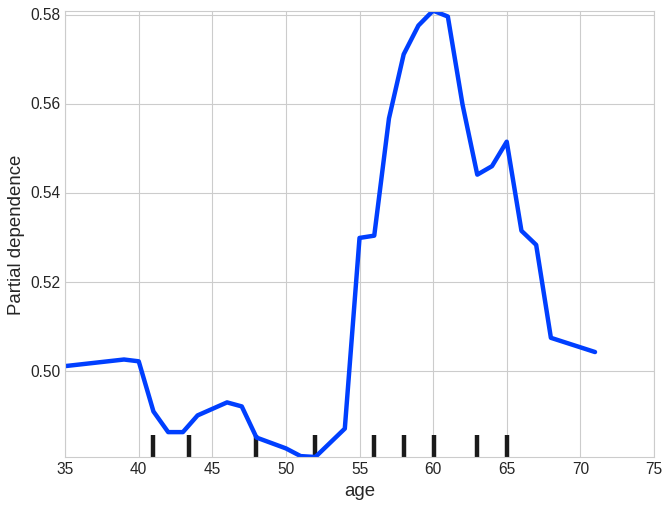

In [426]:
plot_age = plot_partial_dependence(xgb_tuned, features = [0], X = X_test, 
                                   feature_names = X_new.columns[:1] ) 
    

plt.subplots_adjust(top=1.0, right=1.0)
plot_age

This is an interesting graph as the probability of getting heart disease increases rapidly at age 55 and peaks at age 60 but then decreases.  It could be that more individuals get treated for heart disease and are successful at controlling it.  

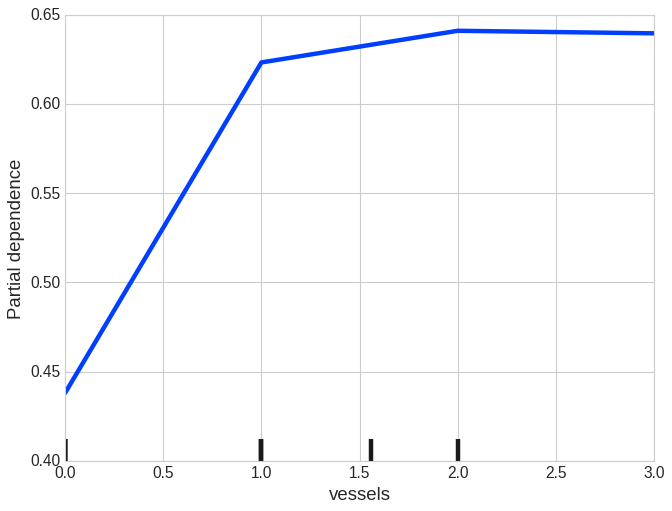

In [429]:
plot_vessels = plot_partial_dependence(xgb_tuned, features = [9], X = X_test, 
                                   feature_names = X_new.columns[:10], grid_resolution=5)     

plt.ylim([0.4, 0.65])
plt.subplots_adjust(top=1.0, right=1.0)
plot_vessels

It is fairly obvious that the presence of certain vessels colored by fluorosopy in any magnitude increase the probability of getting heart disease especially as those numbers increase.

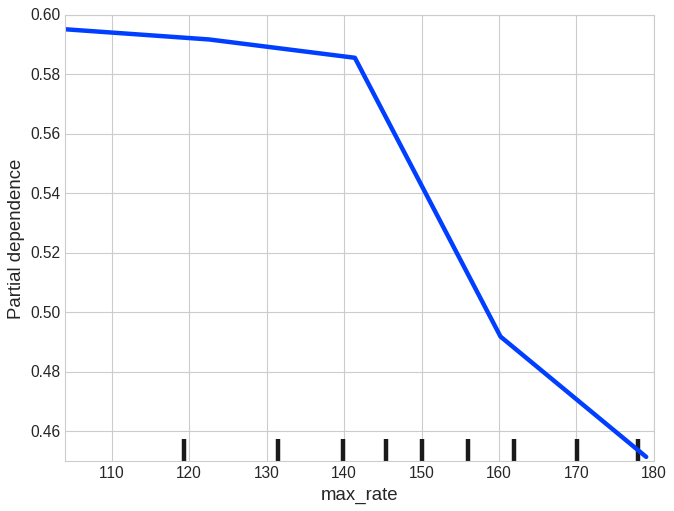

In [434]:
plot_max = plot_partial_dependence(xgb_tuned, features = [6], X = X_test, 
                                   feature_names = X_new.columns[:7], grid_resolution=5)     
plt.xlim([104, 180])
plt.ylim([0.45, 0.6])
plt.subplots_adjust(top=1.0, right=1.0)
plot_max

This one is really surprising as one would think that an increase in maximum heart rate would indicate a higher possibility of getting diagnosed with heart disease.  This variable has a high negative correlation with the target as shown by the heat map earlier.  This could be that as the heart gets weaker, heart rate decreases or it could also be an indicator of certain effects of medication.

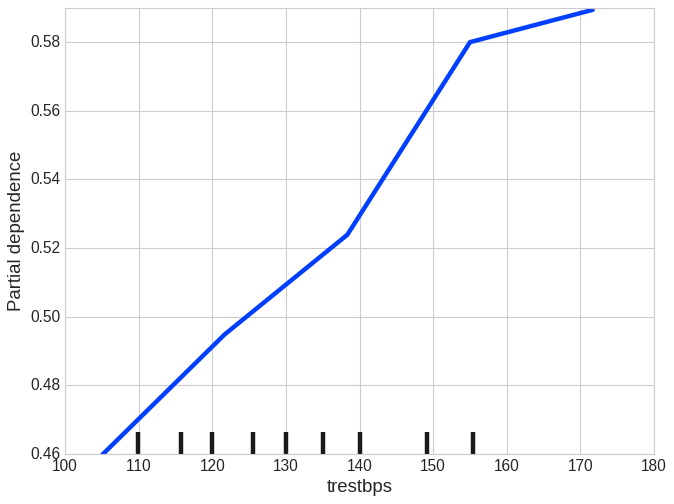

In [461]:
plot_rest = plot_partial_dependence(xgb_tuned, features = [3], X = X_test, 
                                   feature_names = X_new.columns[:4], grid_resolution=5)
     
plt.ylim([0.46, 0.59])
plt.subplots_adjust(top=1.0, right=1.0)
plot_rest

This graph is clear in that high blood pressure should be controlled as it can certainly lead to a higher probability of getting diagnosed with heart disease.

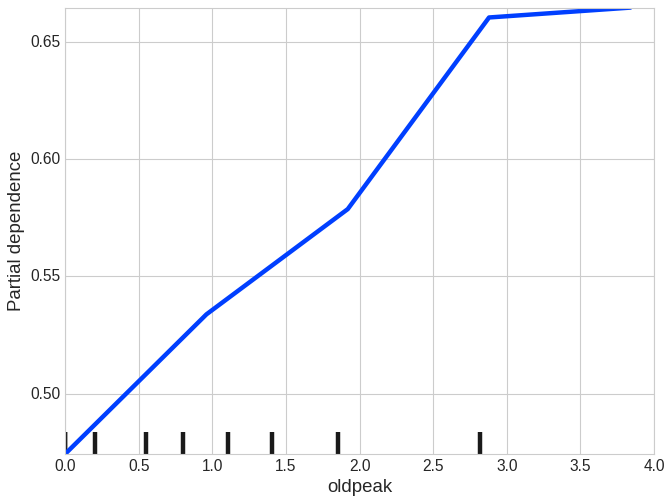

In [462]:
plot_oldpeak = plot_partial_dependence(xgb_tuned, features = [11], X = X_test, 
                                   feature_names = X_new.columns[:12], grid_resolution=5)
     
plt.subplots_adjust(top=1.0, right=1.0)
plot_oldpeak

As ST depression induced by exercise relative to rest increases, the probability of getting diagnosed with heart disease increases.

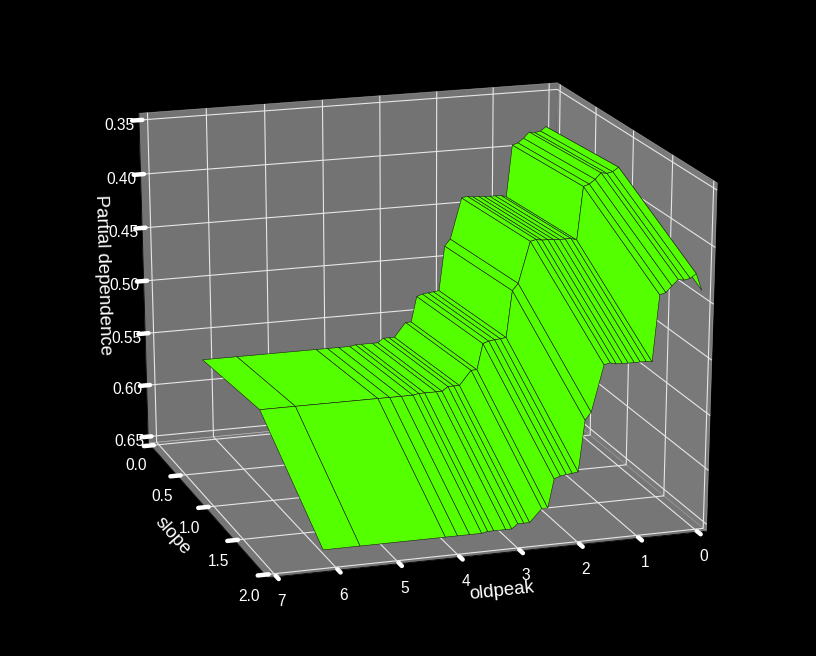

In [445]:
style.use('dark_background')

fig = plt.figure(figsize=(10,8))
target_feature = (11, 8)
pdp, axes = partial_dependence(xgb_tuned, X_train, target_feature,  grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.get_cmap('prism_r', 1), edgecolor='k')
ax.set_xlabel(feature_dict[target_feature[0]])
ax.set_ylabel(feature_dict[target_feature[1]])
ax.set_zlabel('Partial dependence')

ax.view_init(elev=20, azim=72)

plt.subplots_adjust(top=0.9)
ax.invert_zaxis()
plt.show()

**NOTE: The partial dependence axis was inverted for visual effect.** ST depression induced by exercise relative to rest is considered a reliable ECG finding for the diagnosis of obstructive coronary atherosclerosis. As this increases, the partial dependence on the model increases. As 'slope', which is the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping) increases, the probability of getting diagnosed with heart disease increases.  Because value 3 was moved to 0, any presence of slope (upward or downward) decreases the probability of heart disease because a patient with a flat slope is under high risk of getting heart disease.  

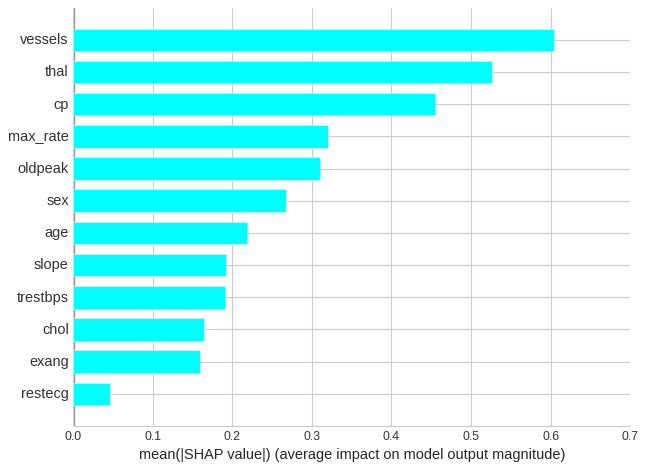

In [441]:
plt.style.use('seaborn-whitegrid')
e = shap.TreeExplainer(xgb_tuned)
shap_values = e.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = list(feature_dict.values()), plot_type = "bar", color = "cyan")

This plot shows that the number of vessels colored by fluorosopy, thalessemia, chest pain and maximum heart rate have a major impact on model output with XGBoost.  While XGBoost was not our best predictor, it may be more effective with more data.  

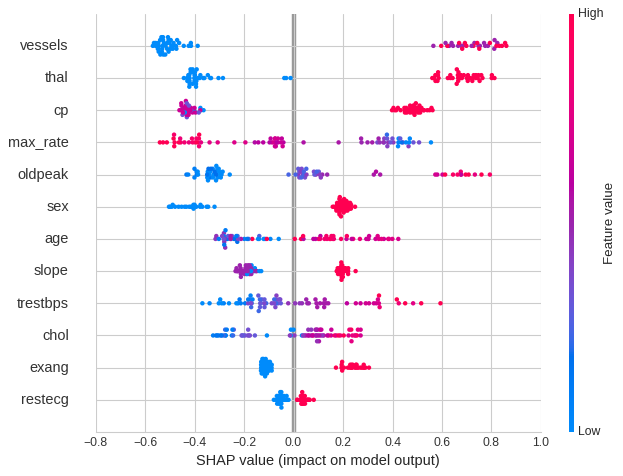

In [442]:
shap.summary_plot(shap_values, X_test, feature_names = list(feature_dict.values()))

It is fairly clear how each feature relates to the XGBoost model.  The number of vessels colored by fluorosopy has a large effect on this model, as well as thalassemia.  You can see the negative affect of maximum heart rate here as well but the feature is still very relavent to the model.  Males are at a higher risk of heart disease.  Age and resting blood pressure have a wide variation where 'restecg' does not affect this model much.

## **Conclusion**

The Support Vector Classifier (SVC) performed the best with a 91% accuracy. This model also had the highest precision and recall as well which is very important in the medical community.  The Naive Bayes Classifier also performed well.  Two different sets of feature importance plots were developed where the number of vessels colored by fluorsopy and chest pain were found to be the most important features in heart disease prediction.  While maximum heart rate has a strong negative influence on the model, this does not mean that it is not important.  This could be that lower heart rates are sign of an ailing heart and a higher chance of heart disease.  Thalessemia, which is a blood disorder that can have fixed or reversible effects was also found to be influential on the probability of getting diagnosed with heart disease.  Other important findings were as ST depression induced by exercise relative to rest increases, the probability of getting heart disease increases, high blood pressure should be controlled as it can certainly lead to a higher probability of heart disease and the probability of getting diagnosed with heart disease is highest around age 60 and decreases thereafter.  Males are also at a higher risk of getting diagnosed with heart disease than females.

The most significant issue with this study is that more data is needed.  There are other data sets available but lack important features such as the number of vessels colored by fluorsopy (which was found to the most significant feature) and thalessemia.  Machine learning models like a great deal of data and XGBoost and Random Forest models would probably perform better with more than 298 observations.  Additionally, stacking needs a great deal of data to be effective as well so that there is an opportunity to take errors from different models and build a more accurate ensemble learner.  This was not accomplished here.

A good portion of this project could be condensed into several functions but for the sake of being thorough, each step of the process was outlined carefully to tell the story of heart disease diagnosis prediction.

